# 3.2 Classification/Regression

Python program to build and test a model for gwp and star dataset, using the dataset obtained from Task 3.1.

In [175]:
import numpy as np
from sklearn.svm import SVR, SVC
from sklearn.model_selection import train_test_split

%load_ext autoreload
%autoreload 2

import bamboo.gwp_pipeline as gwp
import bamboo.star_pipeline as star
from bamboo.processing import read_csv, split_features_and_target, get_feature_and_target_names 
from bamboo.selection import normalize_data
from bamboo.model import Model, get_classification_prediction_data
from bamboo.analysis import *

SEED = 42

GWP_CSV = 'datasets/gwp_assessment.csv'
STAR_CSV = 'datasets/star_assessment.csv'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Dataset Preperation

In [ ]:
# Load data from csv and process it
gwp_data = read_csv(GWP_CSV)
gwp_dataset = gwp.gwp_pipeline(gwp_data)

# Split feature and target sets
X, y = split_features_and_target(gwp_dataset)
X_names, y_name = get_feature_and_target_names(gwp_dataset)

# Split the data into training and test sets and normalise the data
X_gwp_train, X_gwp_test, y_gwp_train, y_gwp_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
X_gwp_train, X_gwp_test = normalize_data(X_gwp_train, X_gwp_test)

In [ ]:
# Load data from csv and process it
star_data = read_csv(STAR_CSV)
star_dataset = star.star_pipeline(star_data)

# Split feature and target sets
X, y = split_features_and_target(star_dataset)
X_names, y_name = get_feature_and_target_names(star_dataset)

# Split the data into training and test sets and normalise the data
X_star_train, X_star_test, y_star_train, y_star_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
X_star_train, X_star_test = normalize_data(X_star_train, X_star_test)

## GWP Model implementation & training
Support Vector Regression (SVR) model.

In [ ]:
# Initialize the SVR model parammeters
parameters = {
    'kernel': ['rbf', 'linear', 'poly','rbf', 'sigmoid'],
    'C': [0.01, 0.1, 1, 10],
    'gamma': [0.1, 0.01, 0.001, 0.0001],
    'epsilon': [0.01, 0.1, 0.2, 0.5]
}

svr = SVR()

# Instantiate the Model class with SVR model and the parameter grid
gwp_model = Model(model=svr, params=parameters, search_type='GridSearch')
gwp_model.fit(X_gwp_train, y_gwp_train)

# Save the model
gwp_model.save_model('models/gwp/svr.pkl')
gwp_model.save_results('results/gwp/svr.pkl')

## Star Model implementation & training
Support Vector Classification (SVC) model.

<div class="warning">
    <strong>Warning:</strong> Running this model with all parameter configurations may take upwards of an hour to complete. You can load in the saved model and result from the local directories if you would like to use the model.
</div>

<style>
.warning {
    background-color: #ffeeba;
    border-color: #ffc107;
    color: #856404;
    padding: 1em;
    margin-top: 1em;
    margin-bottom: 1em;
    border: 1px solid transparent;
    border-radius: 0.25rem;
}
</style>

In [ ]:
# Initialize the SVC search parammeters
parameters = {
    'kernel': ['rbf', 'linear', 'poly','rbf', 'sigmoid'],
    'C': [0.01, 0.1, 1, 10],
    'gamma': [0.1, 0.01, 0.001, 0.0001],
}

svc = SVC(probability=True)

# Instantiate the Model class with SVR model and the parameter grid
star_model = Model(model=svc, params=parameters, search_type="HalvingGridSearch")
star_model.fit(X_star_train, y_star_train)

# Save the model
star_model.save_model('models/star/svc.pkl')
star_model.save_results('results/star/svc.pkl')

## GWP Model Analysis

Load in the saved gwp model and results.

In [42]:
gwp_model = Model()
gwp_model.load_model('models/gwp/svr.pkl')
gwp_model.load_results('results/gwp/svr.pkl')

In [186]:
gwp_configurations = gwp_model.get_configurations(sort_by='Score', n_results=250, ascending=False)
len(gwp_configurations)
gwp_configurations


[{'Params': {'C': 10, 'epsilon': 0.01, 'gamma': 0.1, 'kernel': 'rbf'},
  'Score': 0.3512725338036584,
  'Time Taken': 0.048248577117919925},
 {'Params': {'C': 10, 'epsilon': 0.01, 'gamma': 0.1, 'kernel': 'rbf'},
  'Score': 0.3512725338036584,
  'Time Taken': 0.04828157424926758},
 {'Params': {'C': 1, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'poly'},
  'Score': 0.3259797639996223,
  'Time Taken': 0.011047554016113282},
 {'Params': {'C': 1, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'rbf'},
  'Score': 0.32446185121317883,
  'Time Taken': 0.008447790145874023},
 {'Params': {'C': 1, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'rbf'},
  'Score': 0.32446185121317883,
  'Time Taken': 0.008400821685791015},
 {'Params': {'C': 10, 'epsilon': 0.01, 'gamma': 0.1, 'kernel': 'poly'},
  'Score': 0.3206874191166508,
  'Time Taken': 0.08664994239807129},
 {'Params': {'C': 1, 'epsilon': 0.01, 'gamma': 0.1, 'kernel': 'rbf'},
  'Score': 0.31576361926797036,
  'Time Taken': 0.016679048538208008},
 {'Params': {'C':

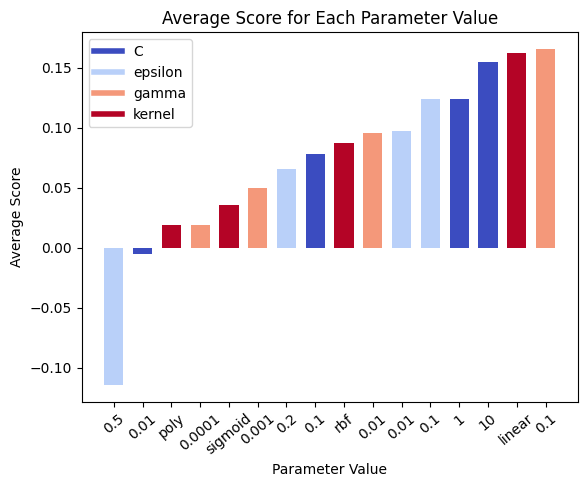

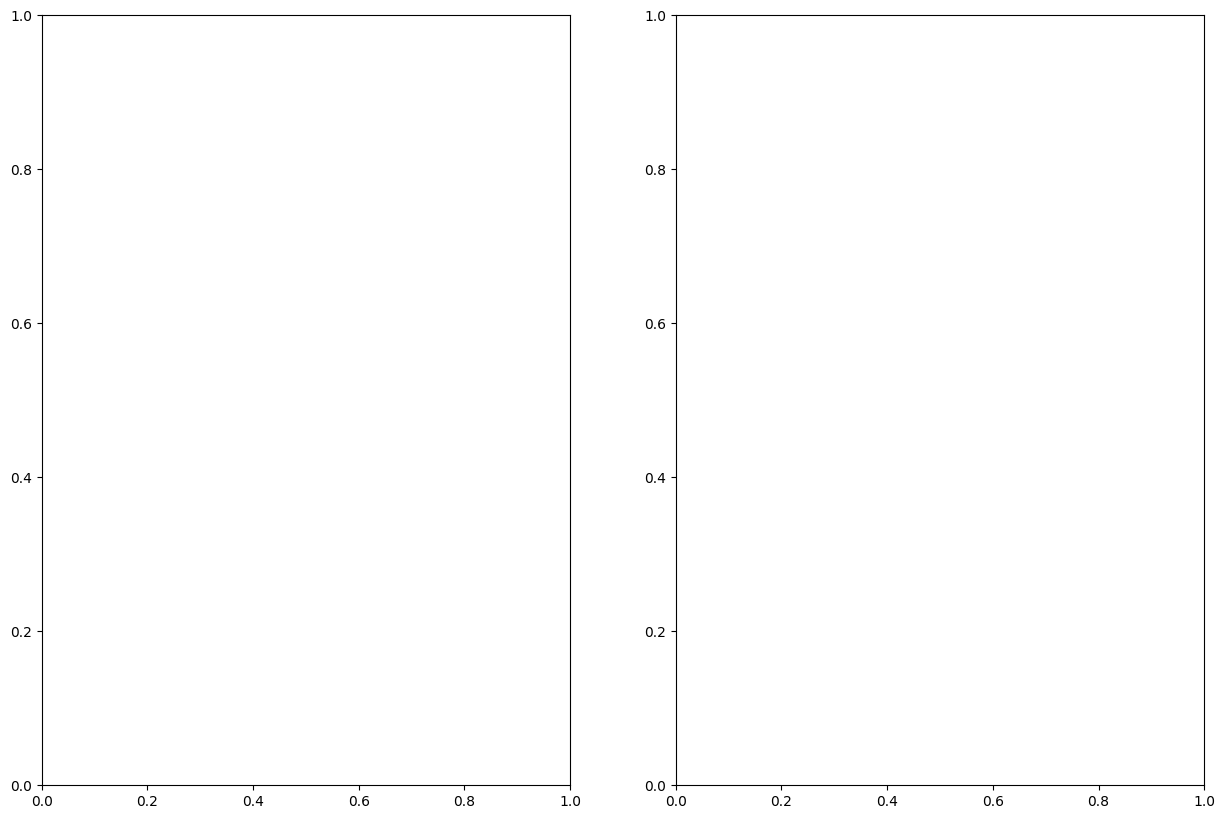

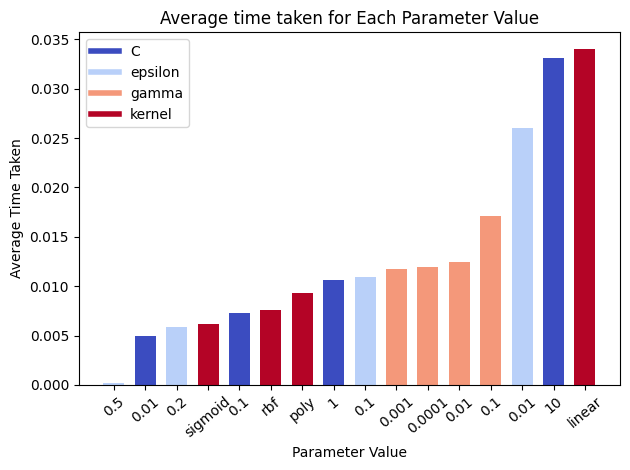

In [190]:
# plot_swarm(gwp_configurations, "kernel")
# plot_swarm(gwp_configurations, "C")
# plot_swarm(gwp_configurations, "gamma")
# plot_swarm(gwp_configurations, "epsilon")

bar_plot_avg_metrics(gwp_configurations)



## Star Model Analysis

Load in the saved star model and results.

In [11]:
star_model = Model()
star_model.load_model('models/star/svc.pkl')
star_model.load_results('results/star/svc.pkl')

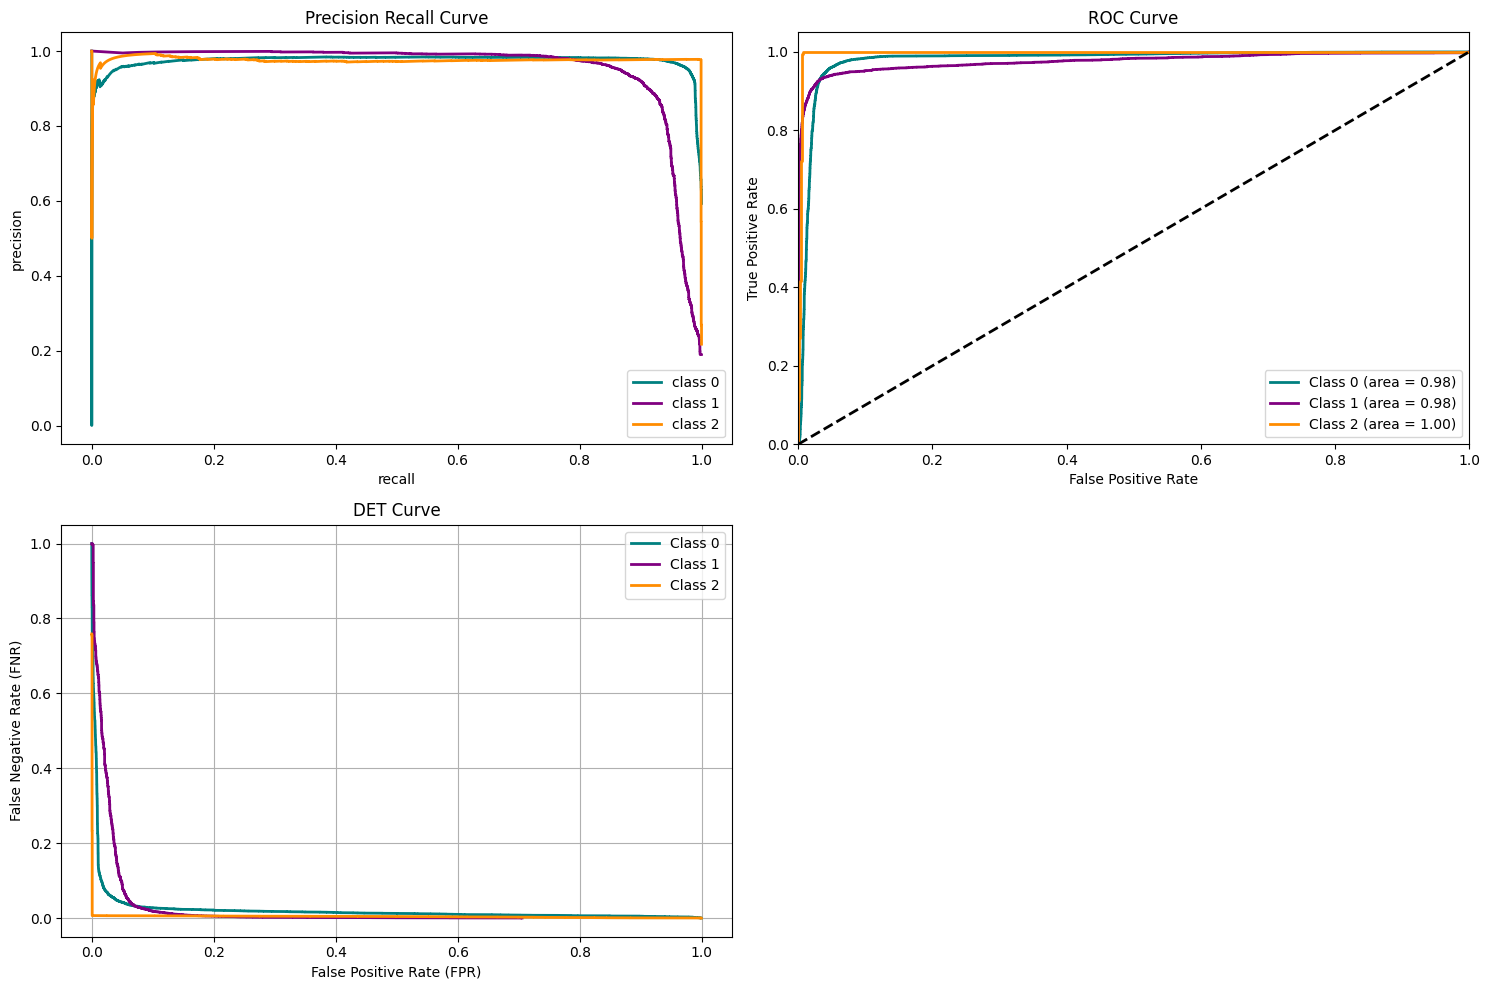

In [101]:
classes = np.unique(y_star_test)
data_per_class = get_classification_prediction_data(star_model.model, X_star_test, y_star_test, classes)

plot_side_by_side(
    lambda: plot_precision_recall_curve(data_per_class, classes), 
    lambda: plot_roc_curve(data_per_class, classes),
    lambda: plot_det_curve(data_per_class, classes),
    titles=['Precision Recall Curve', 'ROC Curve', 'DET Curve'],
    num_cols=2,
    figsize=(15, 10))


In [97]:
star_configurations = star_model.get_configurations(sort_by='Score', n_results=None, ascending=False)
len(star_configurations)

119

#### Markdown Question: 
**Question**: Is Linear Regression a good model to use for the star dataset? Justify your answer.